In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [2]:
#Import data
nyc_crime = pd.read_excel('nyc_crime_2013.xls', sheet_name=0, header=4)

#Rename column to make easier to work with
nyc_crime.columns.values[8] = 'property_crime'

#Cut off last three lines which are headers
nyc_crime = nyc_crime[:348]
nyc_crime.head(5)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,property_crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
4,Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN


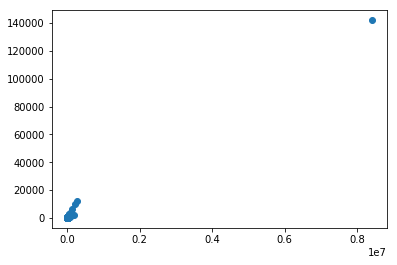

In [3]:
plt.scatter(nyc_crime['Population'], nyc_crime['property_crime'])

In [4]:
#Remove New York City outlier, since it is so far removed from the rest of the datapoints
nyc_crime = nyc_crime.drop(nyc_crime['Population'].idxmax())
nyc_crime.head(5)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,property_crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
4,Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN


In [5]:
#Add dummy variables for burglary and robbery, 
#since they seem like they would be closely associated with proprty crime.

nyc_crime['burglary_dummy'] = np.where((nyc_crime['Burglary']>0), 1,0)
nyc_crime['robbery_dummy'] = np.where((nyc_crime['Robbery']>0), 1,0)
nyc_crime.head(5)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,property_crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,burglary_dummy,robbery_dummy
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0,1,0
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0,1,0
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0,1,0
3,Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN,1,1
4,Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN,1,1


In [6]:
#Add transformations to experiment with.
nyc_crime['pop_sqrt'] = np.sqrt(nyc_crime['Population'])
nyc_crime['prop_crime_sqrt'] = np.sqrt(nyc_crime['property_crime'])

nyc_crime['pop_sin'] = np.sin(nyc_crime['Population'])
nyc_crime['prop_crime_sin'] = np.sin(nyc_crime['property_crime'])

nyc_crime['pop_cos'] = np.cos(nyc_crime['Population'])
nyc_crime['prop_crime_cos'] = np.cos(nyc_crime['property_crime'])

In [7]:
regr = linear_model.LinearRegression()
Y = nyc_crime['prop_crime_sqrt'].values.reshape(-1, 1)
X = nyc_crime['pop_sqrt'].values.reshape(-1, 1)
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 0.1699119]]

Intercept: 
 [-3.3319286]

R-squared:
0.815715359306


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [8]:
regr = linear_model.LinearRegression()
Y = nyc_crime['prop_crime_sin'].values.reshape(-1, 1)
X = nyc_crime['pop_sin'].values.reshape(-1, 1)
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[-0.07234814]]

Intercept: 
 [ 0.03845335]

R-squared:
0.00509617300998


In [9]:
regr = linear_model.LinearRegression()
Y = nyc_crime['prop_crime_cos'].values.reshape(-1, 1)
X = nyc_crime['pop_cos'].values.reshape(-1, 1)
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 0.00741933]]

Intercept: 
 [ 0.00953117]

R-squared:
5.62421345544e-05


In [10]:
#Based on R-squared values, the square-root transformation was clearly the best fit.
#Add two features to create better fit. 

regr = linear_model.LinearRegression()
Y = nyc_crime['prop_crime_sqrt'].values.reshape(-1, 1)
X = nyc_crime[['pop_sqrt', 'robbery_dummy', 'burglary_dummy']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 0.16162006  2.32713161  0.30054016]]

Intercept: 
 [-4.14090464]

R-squared:
0.82142829365


My linear regression model uses the square-root of the city population and binary variables of occurrences of burglary and robbery to predict property crime. I chose to use burglary and robbery because they are more closely related to property crime than things like murder or rape. I chose the square root transformation because it gave a high R-squared vlaue without being so high as to being overfit. 